### Author: [Pratik Sharma](https://github.com/sharmapratik88/)
# Project 1 - Applied Statistics

**Data Description**: The data at hand contains medical costs of people characterized by certain attributes.

**Domain**: Healthcare

**Context**: Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information**
* **`age`**: age of primary beneficiary
* **`sex`**: insurance contractor gender, female, male
* **`bmi`**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`children`**: Number of children covered by health insurance / Number of dependents
* **`smoker`**: Smoking
* **`region`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
* **`charges`**: Individual medical costs billed by health insurance.

**Learning Outcomes**
* Exploratory Data Analysis
* Practicing statistics using Python
* Hypothesis testing

In [1]:
# Importing packages
import pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.options.display.max_rows = 4000
from scipy.stats import chi2

In [2]:
# Reading the data as a dataframe
insurance = pd.read_csv('insurance.csv')

In [3]:
# first five rows of insurance dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Printing out shape of the data
insurance.shape

(1338, 7)

The dataset is of 1338 rows and 7 columns

In [5]:
# Data type of each attribute
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Numeric attributes: `age`, `bmi`, `children`, `charges`

Object attributes: `sex`, `smoker`, `region`

In [6]:
# Checking the presence of missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset has no null values

In [7]:
# Five point summary of numerical attributes
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Measure of CT (3Ms) and Distributions

Measure of central tendency describes the entire dataset with a single value or metric which represents the middle or center of distribution. It is also known as measure of center or central location.

Determining 3Ms and checking the distribution of `age`, `bmi` and `charges` columns

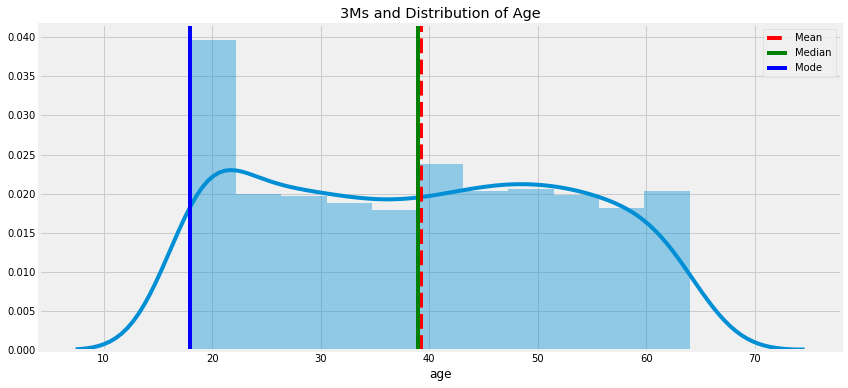

In [8]:
# Distribution of 'Age' alongwith measure of CT (3Ms)
age_mean = insurance['age'].mean()
age_median = insurance['age'].median()
age_mode = insurance['age'].mode()

fig, ax_hist = plt.subplots(figsize = (12.8, 6))
ax_hist = sns.distplot(insurance['age'])

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of Age')

plt.legend(); plt.show()

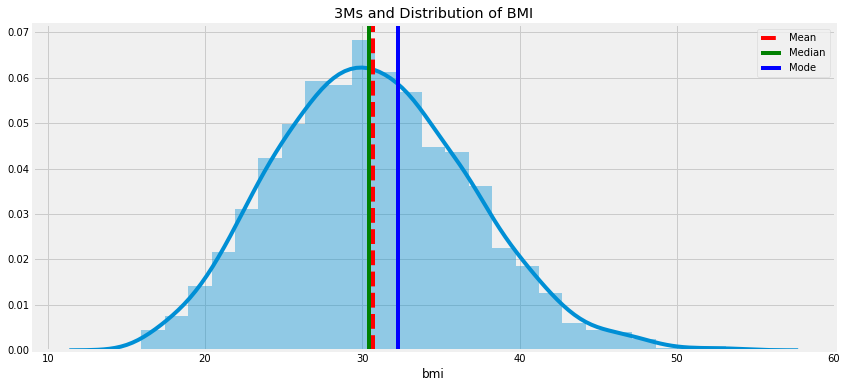

In [9]:
# Distribution of 'BMI' alongwith measure of CT (3Ms)
bmi_mean = insurance['bmi'].mean()
bmi_median = insurance['bmi'].median()
bmi_mode = insurance['bmi'].mode()

fig, ax_hist = plt.subplots(figsize = (12.8, 6))
ax_hist = sns.distplot(insurance['bmi'])

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of BMI')

plt.legend(); plt.show()

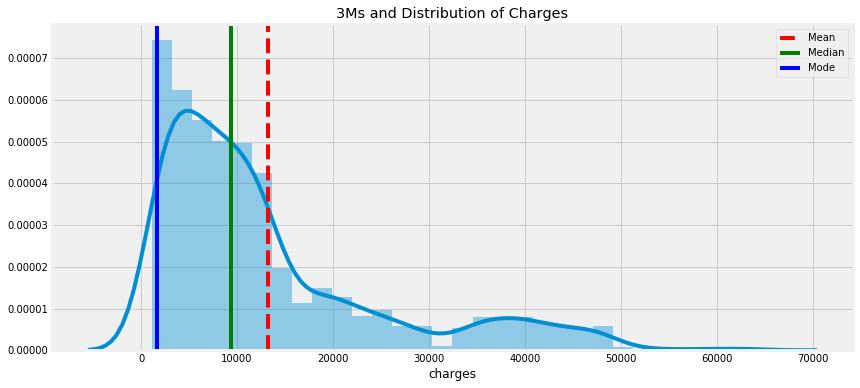

In [10]:
# Distribution of 'Charges' alongwith measure of CT (3Ms)
charges_mean = insurance['charges'].mean()
charges_median = insurance['charges'].median()
charges_mode = insurance['charges'].mode()

fig, ax_hist = plt.subplots(figsize = (12.8, 6))
ax_hist = sns.distplot(insurance['charges'])

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of Charges')

plt.legend(); plt.show()

### Measure of skewness
Skewness is a measure of extent to which a distribution differs from a normal distribution.

The rule of thumb I would use here:
* If the skewness is between -0.5 and 0.5, the data are **fairly symmetrical**
* If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are **moderately skewed**
* If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are **highly skewed**

Determining skewness of `age`, `bmi` and `charges` columns and ploting the results after fitting a norm distribution

In [11]:
# Measure of Skewness and kurtosis for 'age', 'bmi' and 'charges' columns
print("Skewness of 'Age': {}\n".format(insurance['age'].skew().round(3)))

print("Skewness of 'BMI': {}\n".format(insurance['bmi'].skew().round(3)))

print("Skewness of 'Charges': {}\n".format(insurance['charges'].skew().round(3)))

Skewness of 'Age': 0.056

Skewness of 'BMI': 0.284

Skewness of 'Charges': 1.516



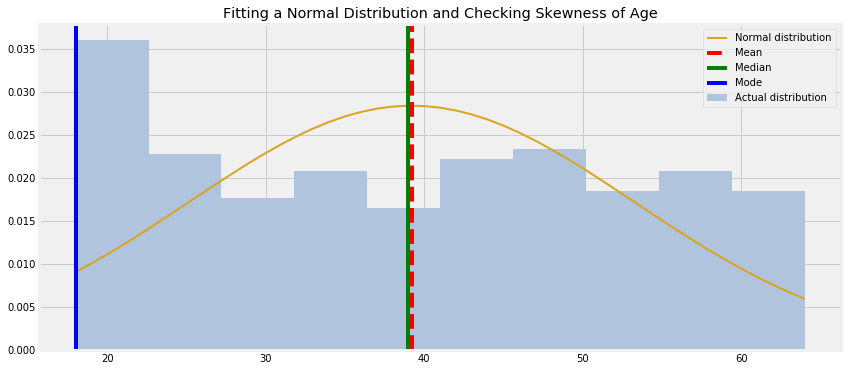

In [12]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance['age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of Age')

plt.legend(); plt.show()

We can see in the above graph that **`age`** is **positively (right, Mode < Median < Mean) skewed** with **skewness score 0.056 (fairly symmetrical)**.

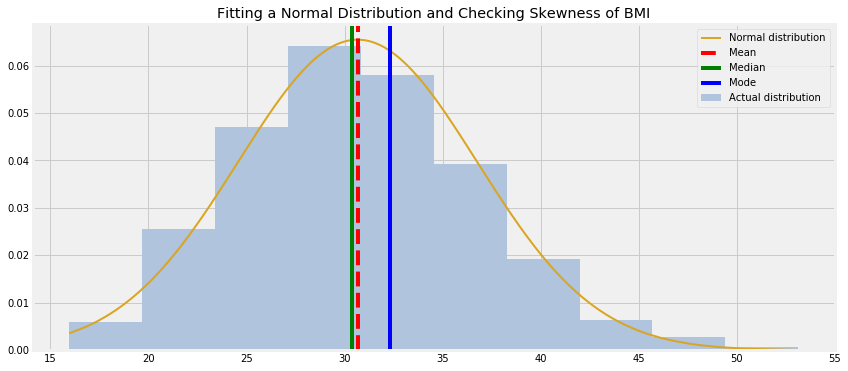

In [13]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance['bmi'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of BMI')

plt.legend(); plt.show()

We can see in the above graph that **`bmi`** is **positively (right, median < mean)** skewed with **skewness score 0.284 (fairly symmetrical)**.

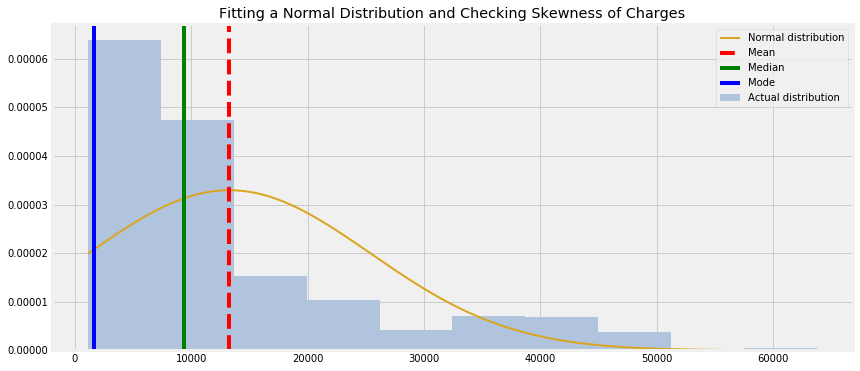

In [14]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of Charges')

plt.legend(); plt.show()

We can see in the above graph that **`charges`** is **positively (right, mode < median < mean)** skewed with **skewness score 1.516 (highly skewed)**.

### Outliers
In statistics, an outlier is an observation point that is distant from other observations.

**Ways to detect outliers**
* ***Box Plot***: In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

* ***Scatter Plot***: A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

* ***Z-score***: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

* ***IQR score***: The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

I would be using Boxplot (to visualize), IQR (to display the columns) for outliers

,age,sex,bmi,children,smoker,region,charges


Text(0.5, 1.0, 'Outlier in Age')

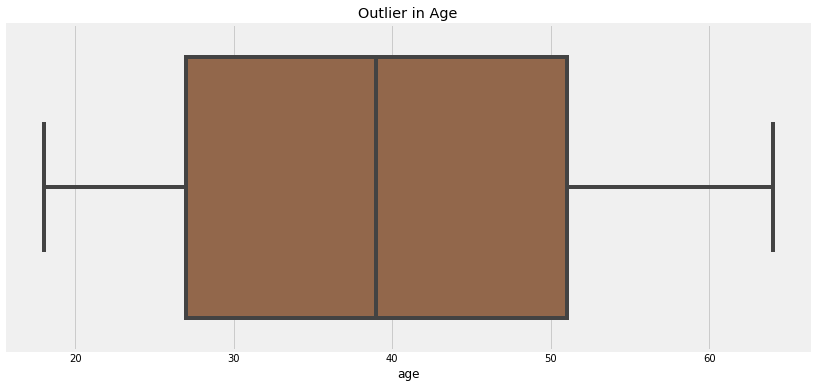

In [15]:
# Outliers in Age
Q3 = insurance['age'].quantile(0.75)
Q1 = insurance['age'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance.loc[(insurance['age'] < (Q1 - 1.5 * IQR)) | (insurance['age'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8 , 6))
sns.boxplot(insurance['age'], palette = 'copper').set_title('Outlier in Age')

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


Text(0.5, 1.0, 'Outlier in BMI')

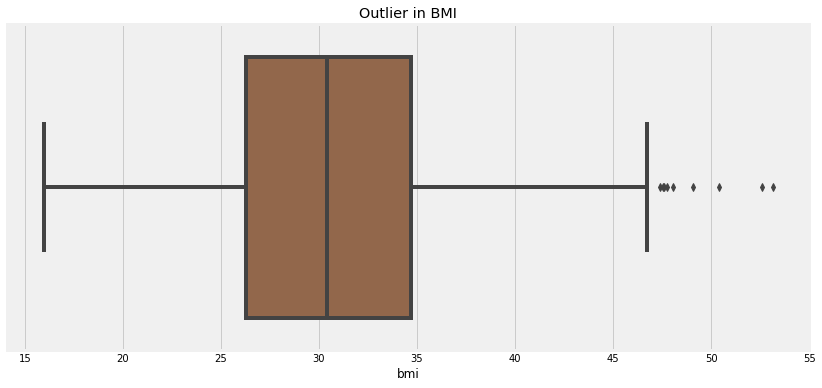

In [16]:
# Outliers in BMI
Q3 = insurance['bmi'].quantile(0.75)
Q1 = insurance['bmi'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance.loc[(insurance['bmi'] < (Q1 - 1.5 * IQR)) | (insurance['bmi'] > (Q3 + 1.5 * IQR))])

plt.figure(figsize = (12.8 , 6))
sns.boxplot(insurance['bmi'], palette = 'copper').set_title('Outlier in BMI')

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


Text(0.5, 1.0, 'Outlier in Charges Using Boxplot')

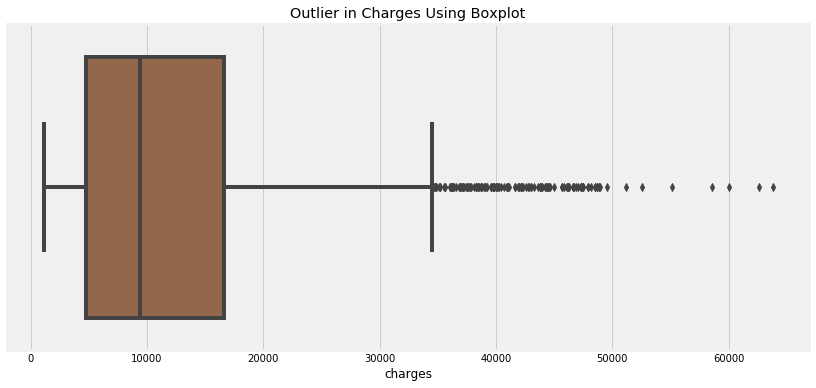

In [17]:
# Outliers in Charges
Q3 = insurance['charges'].quantile(0.75)
Q1 = insurance['charges'].quantile(0.25)
IQR = Q3 - Q1 
display(insurance.loc[(insurance['charges'] < (Q1 - 1.5 * IQR)) | (insurance['charges'] > (Q3 + 1.5 * IQR))].head(5))

plt.figure(figsize = (12.8 , 6))
sns.boxplot(insurance['charges'], palette = 'copper').set_title('Outlier in Charges Using Boxplot')

`age` column has no outliers while the columns such as `bmi` and `charges` have the outliers

### Distribution of categorical columns (including children)

In [18]:
# Convert children to categorical
insurance['children'] = pd.Categorical(insurance['children'])

# Replace non-smoker with 0 and smoker with 1
insurance['smoker'] = insurance['smoker'].replace({'no': 0, 'yes': 1})

# Replace male with 1 and female with 0
insurance['sex'] = insurance['sex'].replace({'female': 0, 'male': 1})

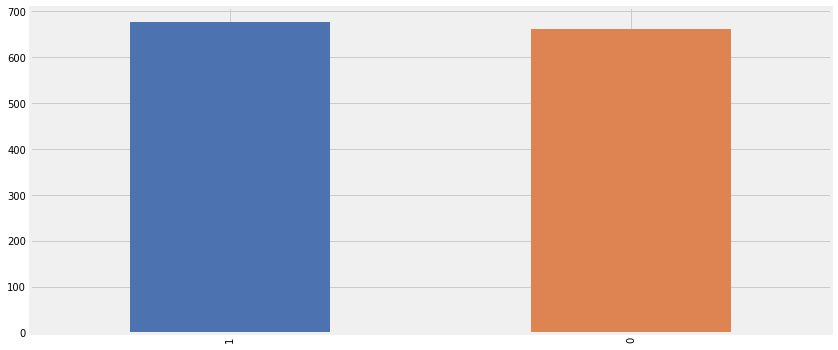

In [19]:
# Distribution of sex - Male - 1, Female - 0
plt.figure(figsize = (12.8 , 6))

insurance['sex'].value_counts().plot.bar(color = sns.color_palette('deep', 2))

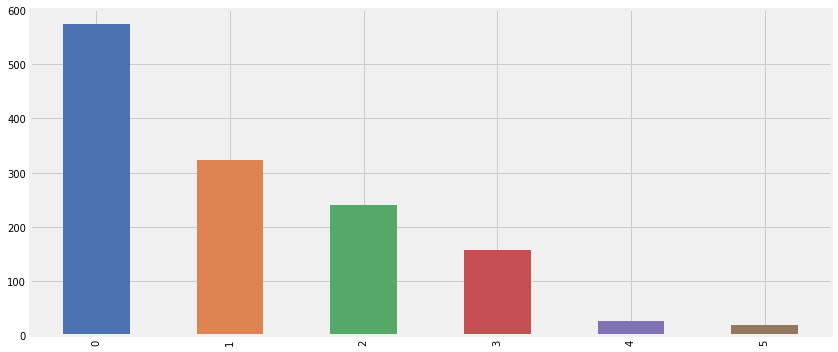

In [20]:
# Distribution of children
plt.figure(figsize = (12.8 , 6))

insurance['children'].value_counts().plot.bar(color = sns.color_palette('deep', 6))

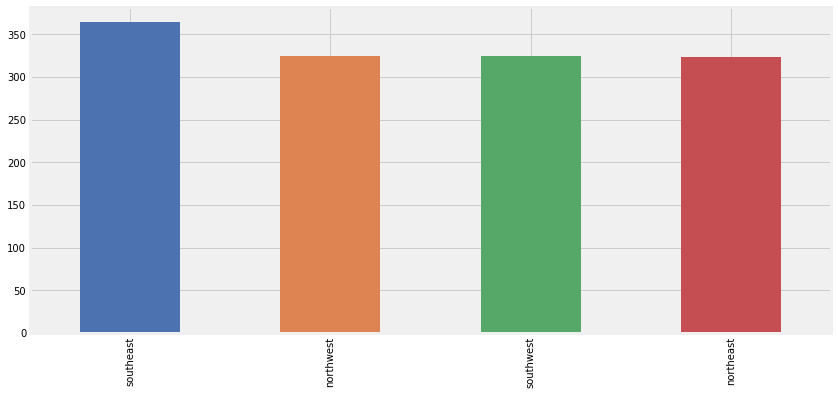

In [21]:
# Distribution of region
plt.figure(figsize = (12.8 , 6))

insurance['region'].value_counts().plot.bar(color = sns.color_palette('deep', 4))

Text(0.5, 1.0, 'Count of Smokers by Sex')

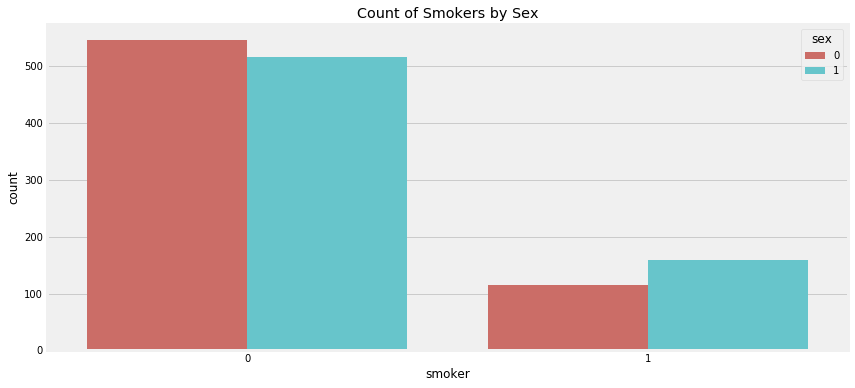

In [22]:
# Count of smokers vs sex, Male - 1, Female - 0
fig = plt.figure(figsize = (12.8, 6))

sns.countplot(x = 'smoker', hue = 'sex', palette = 'hls', data = insurance).set_title('Count of Smokers by Sex')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

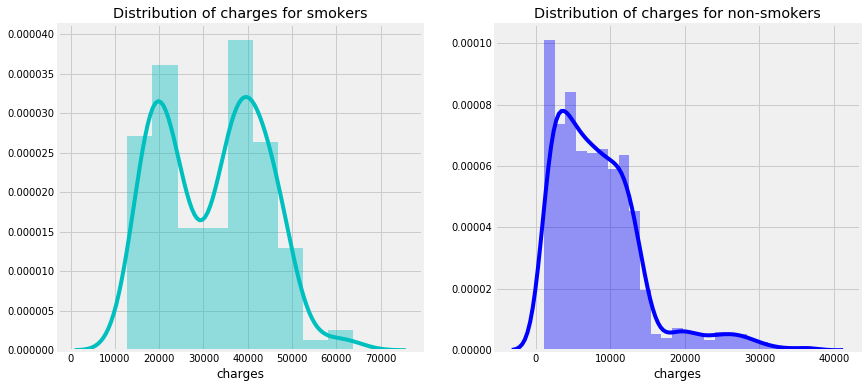

In [23]:
# Distribution of charges for smokers category
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(insurance[(insurance['smoker'] == 1)]['charges'], color = 'c', 
             ax = ax).set_title('Distribution of charges for smokers')

ax= fig.add_subplot(122)
sns.distplot(insurance[(insurance['smoker'] == 0)]['charges'], color = 'b', 
             ax = ax).set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Count of Smoker for Age >18 by Sex')

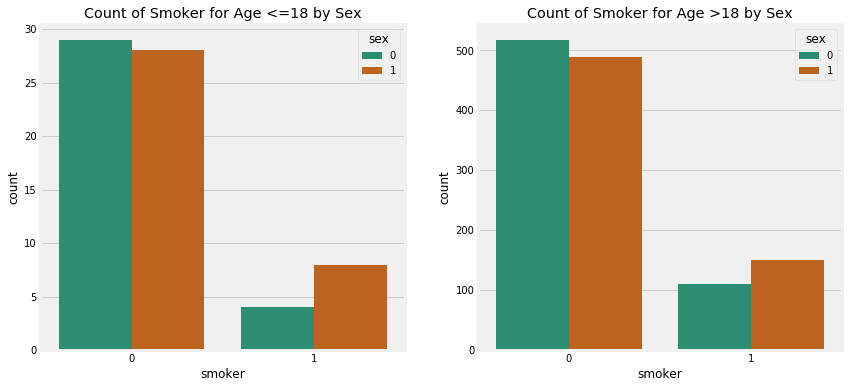

In [24]:
# Count of smokers vs age (<18 and >18)
# Sex: Male - 1, Female - 0
fig = plt.figure(figsize = (12.8, 6))

ax = fig.subplots(1, 2)
sns.countplot(x = 'smoker', hue = 'sex', palette = 'Dark2', 
                  data = insurance[(insurance['age'] <= 18)], ax = ax[0]).set_title('Count of Smoker for Age <=18 by Sex')

sns.countplot(x = 'smoker', hue = 'sex', palette = 'Dark2', 
                  data = insurance[(insurance['age'] > 18)], ax = ax[1]).set_title('Count of Smoker for Age >18 by Sex')

Text(0.5, 1.0, 'Distribution of Charges for Male and Female by Smoker and Non-smokers')

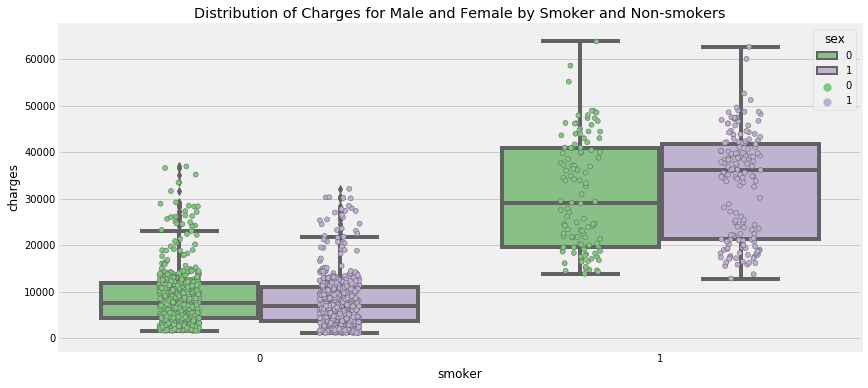

In [25]:
# Distribution of charges for male and female smoker and non-smokers

fig = plt.figure(figsize = (12.8, 6))

ax = sns.boxplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = insurance)
ax = sns.stripplot(x = 'smoker', y = 'charges', hue = 'sex', palette = 'Accent', data = insurance, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Charges for Male and Female by Smoker and Non-smokers')

Text(0.5, 1.0, 'Distribution of Charges by Number of Children')

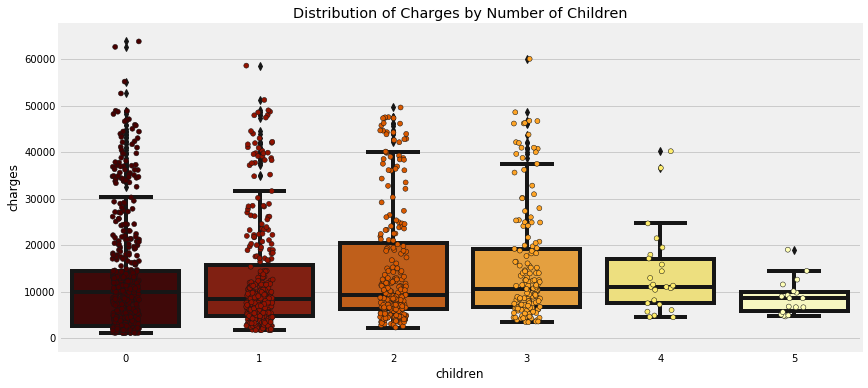

In [26]:
# Boxplot for medical charges by number of children
fig = plt.figure(figsize = (12.8, 6))

ax = sns.boxplot(x = 'children', y = 'charges', palette = 'afmhot', data = insurance)
ax = sns.stripplot(x = 'children', y = 'charges', palette = 'afmhot', data = insurance, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Charges by Number of Children')

Text(0.5, 1.0, 'Distribution of Charges by Region')

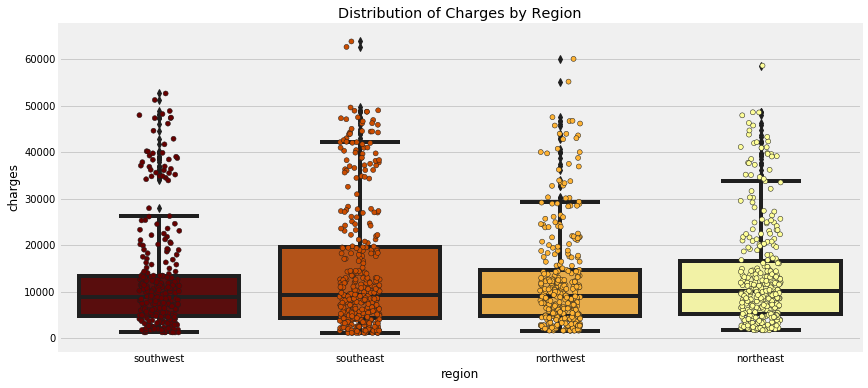

In [27]:
# Boxplot for medical charges by region
fig = plt.figure(figsize = (12.8, 6))

ax = sns.boxplot(x = 'region', y = 'charges', palette = 'afmhot', data = insurance)
ax = sns.stripplot(x = 'region', y = 'charges', palette = 'afmhot', data = insurance, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Charges by Region')

Text(0.5, 1.0, 'Distribution of charges for patients with BMI greater than 30')

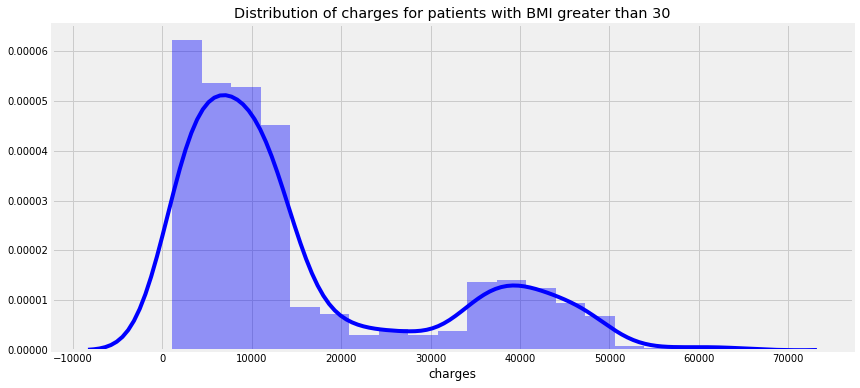

In [28]:
# Distribution of charges for patients with BMI greater than 30
fig = plt.figure(figsize = (12.8, 6))

sns.distplot(insurance[(insurance['bmi'] >= 30)]['charges'], color = 'b').set_title(
    'Distribution of charges for patients with BMI greater than 30')

Text(0.5, 1.0, 'Distribution of charges for patients with BMI less than 30')

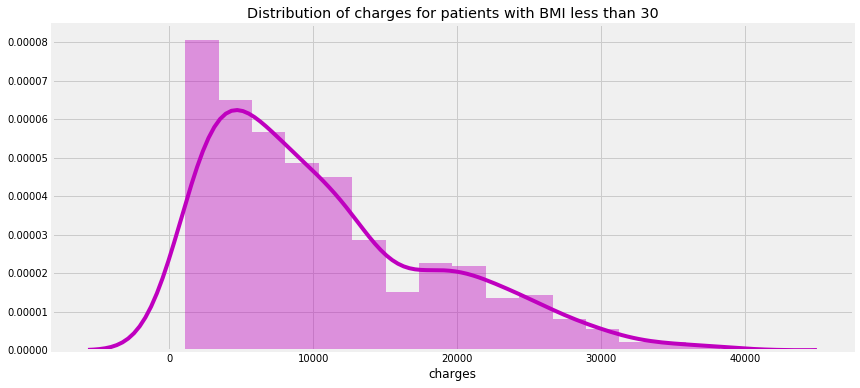

In [29]:
# Distribution of charges for patients with BMI less than 30
fig = plt.figure(figsize = (12.8, 6))

sns.distplot(insurance[(insurance['bmi'] < 30)]['charges'], color = 'm').set_title(
    'Distribution of charges for patients with BMI less than 30')

There are almost equal number of male and female records in the dataset. People with zero children are the most in the dataset. Most of the people are from southwest region. Smokers spend most on the treatments and the count of male smokers is higher in the dataset against the female smokers. People with 5 children, on average, has less medical expenditures compared to the other groups.

### Pair plot that includes all the columns of the data frame

In [30]:
# Replace 0 with no and 1 with yes
insurance['smoker'] = insurance['smoker'].replace({0: 'no', 1: 'yes'})

# Replace 1 with male and 0 with female
insurance['sex'] = insurance['sex'].replace({0: 'female', 1: 'male'})

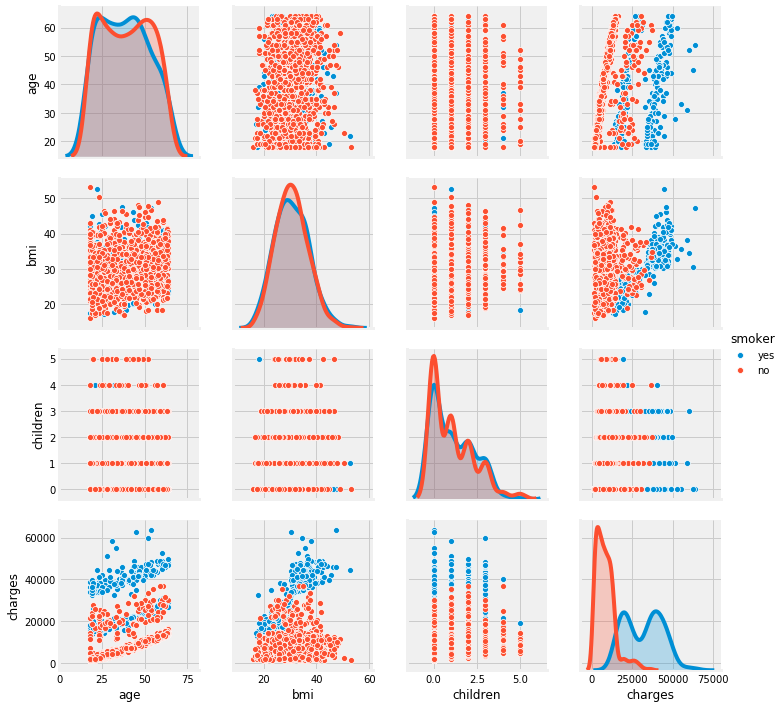

In [31]:
sns.pairplot(insurance, hue = 'smoker')

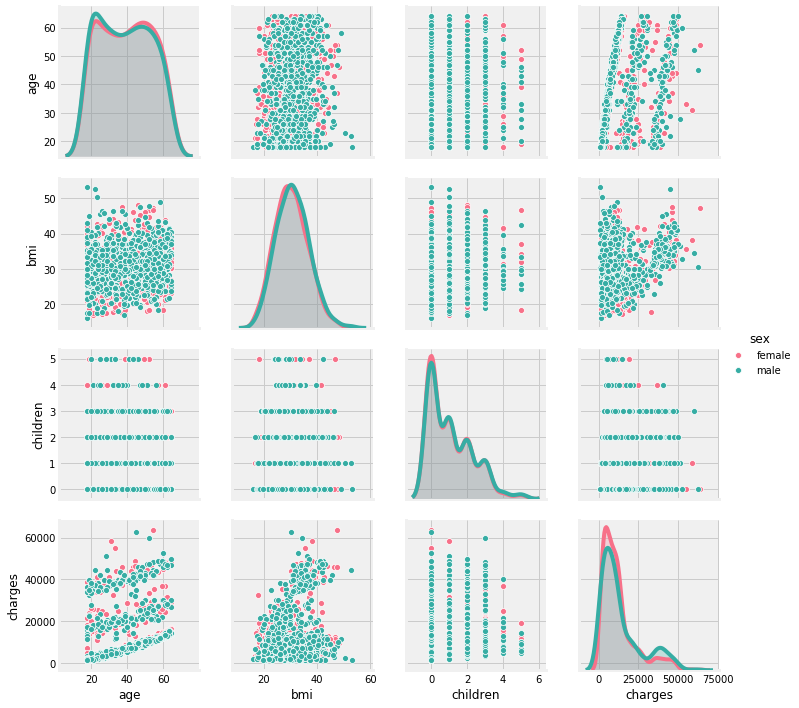

In [32]:
sns.pairplot(insurance, hue = 'sex', palette = 'husl')

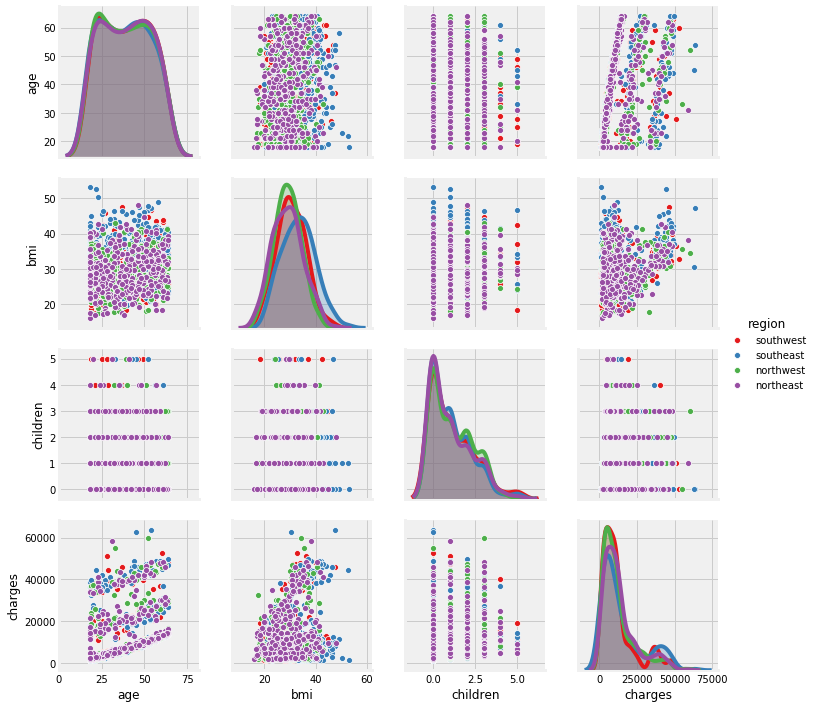

In [33]:
sns.pairplot(insurance, hue = 'region', palette = 'Set1')

### Statistical evidence: *Do charges of people who smoke differs significantly from the people who don't*

**T-test**: A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

**H0 = Charges for smokers and non-smokers don't differ significantly**

**H1 = Charges for smokers and non-smokers differs significantly**

In [34]:
smokers = np.array(insurance[insurance['smoker'] == 'yes']['charges'])
non_smokers = np.array(insurance[insurance['smoker'] == 'no']['charges'])

print('Mean of Charges for Smokers: {}'.format(smokers.mean().round(2)))
print('Mean of Charges for Non-smokers: {}\n'.format(non_smokers.mean().round(2)))

#performing an independent T-test
t, p_value = stats.ttest_ind(smokers, non_smokers, axis = 0)
if p_value <0.05:
    
    print(f'With a p-value of {round(p_value, 4)} the difference is significant. aka |We reject the null|')
    print('Charges differs significantly.')

else:
    
    print(f'With a p-value of {round(p_value, 4)} the difference is not significant. aka |We fail to reject the null|')
    print("Charges don't differ significantly.")

Mean of Charges for Smokers: 32050.23
Mean of Charges for Non-smokers: 8434.27

With a p-value of 0.0 the difference is significant. aka |We reject the null|
Charges differs significantly.


### **Statistical evidence:** ***Does bmi of males differ significantly from that of females?***

**H0 = BMI of male and female don't differ significantly**

**H1 = BMI of male and female differs significantly**

In [35]:
male_bmi = np.array(insurance[insurance['sex'] == 'male']['bmi'])
female_bmi = np.array(insurance[insurance['sex'] == 'female']['bmi'])

print('Mean of Charges for Smokers: {}'.format(male_bmi.mean().round(2)))
print('Mean of Charges for Non-smokers: {}\n'.format(female_bmi.mean().round(2)))

#performing an independent T-test
t, p_value = stats.ttest_ind(male_bmi, female_bmi, axis = 0)
if p_value <0.05:
    
    print(f'With a p-value of {round(p_value, 4)} the difference is significant. aka |We reject the null|')
    print('BMI of male and female differs significantly.')

else:
    
    print(f'With a p-value of {round(p_value, 4)} the difference is not significant. aka |We fail to reject the null|')
    print("BMI of male and female don't differ significantly.")

Mean of Charges for Smokers: 30.94
Mean of Charges for Non-smokers: 30.38

With a p-value of 0.09 the difference is not significant. aka |We fail to reject the null|
BMI of male and female don't differ significantly.


Text(0.5, 1.0, 'Distribution of BMI of Female')

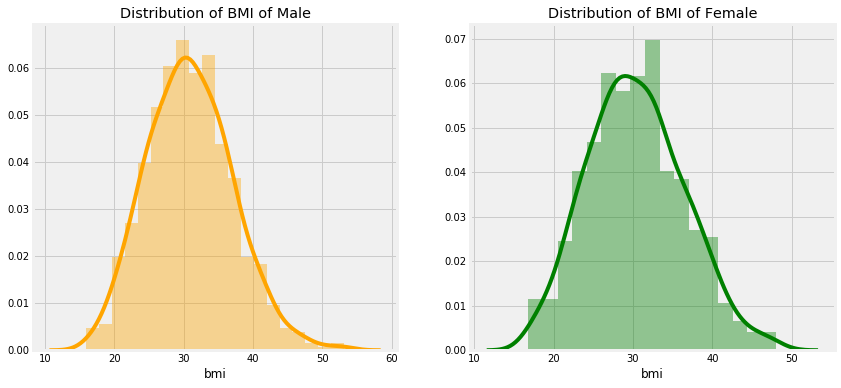

In [36]:
# Visualizing
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(insurance[(insurance['sex'] == 'male')]['bmi'], color = 'orange', 
             ax = ax).set_title('Distribution of BMI of Male')

ax= fig.add_subplot(122)
sns.distplot(insurance[(insurance['sex'] == 'female')]['bmi'], color = 'green', 
             ax = ax).set_title('Distribution of BMI of Female')

### Statistical evidence: *Is the proportion of smokers significantly different in different genders?*

**H0: Proportion of smokers in male and female are equal**

**H1: Proportion of smokers in male and female are not equal**

In [37]:
female_smokers = insurance[insurance['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insurance[insurance['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = insurance['sex'].value_counts()['female'] # number of females in the data
n_males = insurance['sex'].value_counts()['male'] #number of males in the data

In [38]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f'Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
Proportion of smokers in females, males = 0.17%, 0.24% respectively


Proportions are different, but are they statistically significant?

In [39]:
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if p_value < 0.05:
    print(f'With a p-value of {round(p_value, 4)} the difference is significant. aka |We reject the null|')
    print('Proportion of smokers in male and female are not equal.')

else:
    print(f'With a p-value of {round(p_value, 4)} the difference is not significant. aka |We fail to reject the null|')
    print('Proportion of smokers in male and female are equal.')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|
Proportion of smokers in male and female are not equal.


##### Broader category
Chi-square test is used to compare categorical variables.

**H0: Smoker and Gender are independent**

**H1: Smoker and Gender are not independent**

In [40]:
contingency_table = pd.crosstab(insurance['sex'], insurance['smoker'])
print('Contigency Table:')
display(np.array(contingency_table))

#Observed Values
Observed_Values = contingency_table.values
print('Observed Values:')
display(Observed_Values)

b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print('Expected Values:')
display(Expected_Values)

Contigency Table:


array([[547, 115],
       [517, 159]], dtype=int64)

Observed Values:


array([[547, 115],
       [517, 159]], dtype=int64)

Expected Values:


array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]])

In [41]:
no_of_rows = len(contingency_table.iloc[0:2, 0])

no_of_columns = len(contingency_table.iloc[0, 0:2])

ddof = (no_of_rows - 1)*(no_of_columns - 1) #degree of freedom

alpha = 0.05 #alpha value

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)]) #chi square

chi_square_statistic = chi_square[0] + chi_square[1] #chi square statistic

critical_value = chi2.ppf(q = 1-alpha, df = ddof) #critical value

p_value = 1-chi2.cdf(x = chi_square_statistic,df = ddof) #p-value

In [42]:
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic: ', chi_square_statistic)
print('critical_value: ', critical_value)
print('p-value: ', p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic:  7.765921028604451
critical_value:  3.841458820694124
p-value:  0.005324114164320548


In [43]:
if chi_square_statistic >= critical_value:
    print('Reject H0, there is a relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are independent.')
    
else:
    print('Fail to reject H0, there is no relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are not independent.')
    
if p_value <= alpha:
    print('Reject H0, there is a relationship between 2 categorical variables based on p-values.')
    print('Proportion of Smokers and Gender are independent.')

else:
    print('Fail to reject H0, there is no relationship between 2 categorical variables based on p-values.')
    print('Proportion of Smokers and Gender are not independent.')

Reject H0, there is a relationship between 2 categorical variables based on critical values.
Proportion of Smokers and Gender are independent.
Reject H0, there is a relationship between 2 categorical variables based on p-values.
Proportion of Smokers and Gender are independent.


### Statistical evidence: *Is the distribution of bmi across women with no children, one child and two children, the same?*

**ANOVA**, also known as analysis of variance, is used to compare multiple (three or more) samples with a single test. There are 2 major flavors of ANOVA
1. **One-way ANOVA**: It is used to compare the difference between the three or more samples/groups of a single independent variable.
2. **MANOVA**: MANOVA allows us to test the effect of one or more independent variable on two or more dependent variables. In addition, MANOVA can also detect the difference in co-relation between dependent variables given the groups of independent variables.

The hypothesis being tested in ANOVA is
* H0: All pairs of samples are same i.e. all sample means are equal
* H1: At least one pair of samples is significantly different

In [44]:
anova = insurance[['bmi', 'sex', 'children']].copy()
anova = anova[anova['sex'] == 'female']
anova.drop('sex', axis = 1, inplace = True)

anova = anova.loc[(anova['children'] == 0) | (anova['children'] == 1) | (anova['children'] == 2)]
anova['children'] = anova['children'].replace({0: 'No Child', 1: '1 Child', 2: '2 Child'})
anova = anova.reset_index(drop = True)

groups = anova.groupby('children').groups

no_child = anova['bmi'][groups['No Child']]
one_child = anova['bmi'][groups['1 Child']]
two_child = anova['bmi'][groups['2 Child']]

# Perform the ANOVA
stats.f_oneway(no_child, one_child, two_child)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [45]:
# Another way
model = ols('bmi ~ children', data = anova).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Wed, 14 Aug 2019   Prob (F-statistic):              0.716
Time:                        02:18:13   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               30.0527 

In [46]:
# ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


Higher F statistic implies a relationship between the variables. Generally, we take the cutoff for p-value as 0.05 (which is 95% significance level). **We fail to reject our null hypothesis and conclude that the distribution of bmi across women with no children, one child and two children is same i.e. means are ~equal.**

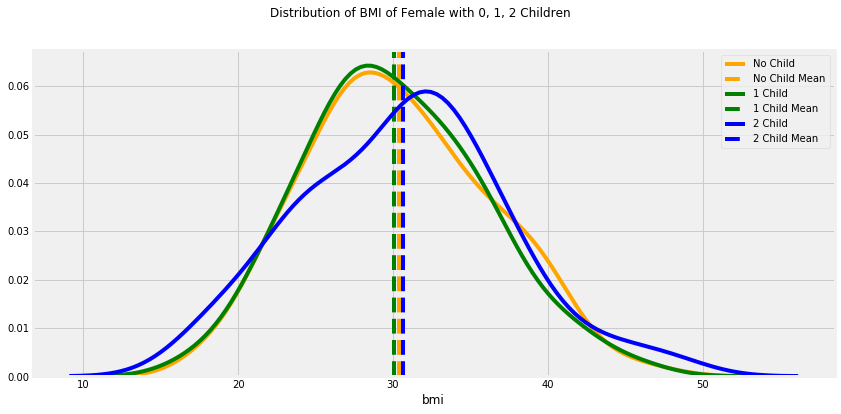

In [47]:
# Visualizing
fig, ax_hist = plt.subplots(figsize = (12.8, 6))

sns.distplot(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 0)]['bmi'], 
             color = 'orange', hist = False, label = 'No Child')
ax_hist.axvline(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 0)]['bmi'].mean(), 
                color = 'orange', linestyle = '--', label = 'No Child Mean')

sns.distplot(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 1)]['bmi'], 
             color = 'green', hist = False, label = '1 Child')
ax_hist.axvline(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 1)]['bmi'].mean(), 
                color = 'green', linestyle = '--', label = '1 Child Mean')

sns.distplot(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 2)]['bmi'], 
             color = 'blue', hist = False, label = '2 Child')
ax_hist.axvline(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 2)]['bmi'].mean(), 
                color = 'blue', linestyle = '--', label = '2 Child Mean')

plt.suptitle('Distribution of BMI of Female with 0, 1, 2 Children'); plt.legend(); plt.show()